## Week 1 Lab

#### Please put your full name in the filename you upload
#### Dipesh Mainali

### 1. Install and import the following libraries



Pandas  
Numpy  
scikit-learn (sklearn)  
matplotlib


##### One of the following two PostGreSQL libraries.  You will need one of these on your machine to make a database call next class.
psycopg2 (easier if you prefer to use anaconda)  
postgresql (pip install py-postgresql --- harder if you're using anaconda) 


In [16]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import psycopg2
import postgresql  # pip install py-postgresql  ### 58

### 2. Create a pandas DataFrame from the New York Times Covid data at the following URL:

##### Data was kept live through early 2023

https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv

In [17]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv')

In [18]:
df

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0
...,...,...,...
1153,2023-03-19,103784916,1133826
1154,2023-03-20,103794703,1133964
1155,2023-03-21,103813076,1134177
1156,2023-03-22,103864888,1134913


### 3. Create a new column with the day-over-day change in the 'cases' column
The 'cases' column in the dataset is cumulative cases.  
https://pandas.pydata.org/docs/getting_started/intro_tutorials/05_add_columns.html

In [19]:
df['f_cases'] = df['cases'].diff()
df.at[0, 'f_cases'] = df.at[0, 'cases']

In [20]:
df

,date,cases,deaths,f_cases
0,2020-01-21,1,0,1.0
1,2020-01-22,1,0,0.0
2,2020-01-23,1,0,0.0
3,2020-01-24,2,0,1.0
4,2020-01-25,3,0,1.0
...,...,...,...,...
1153,2023-03-19,103784916,1133826,1424.0
1154,2023-03-20,103794703,1133964,9787.0
1155,2023-03-21,103813076,1134177,18373.0
1156,2023-03-22,103864888,1134913,51812.0


### 4. Import matplotlib and use the "%matplotlib notebook" magic

hint:  https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-matplotlib

In [21]:
import matplotlib
%matplotlib notebook

In [22]:
%matplotlib inline

### 5. Using the matplotlib import, chart the US cases by day

<Axes: >

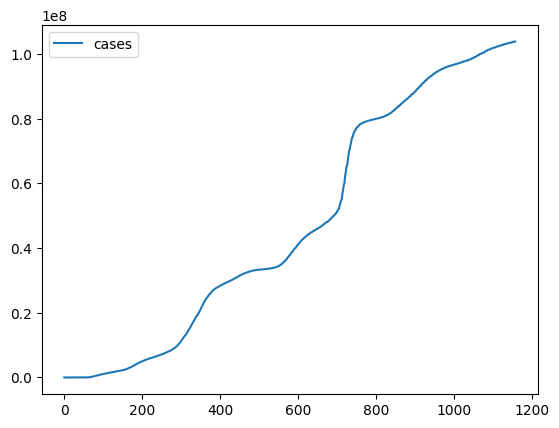

In [24]:
# Can be plotted directly using panda plot funtion
df[['date','cases']].plot()

In [25]:
import matplotlib.pyplot as plot

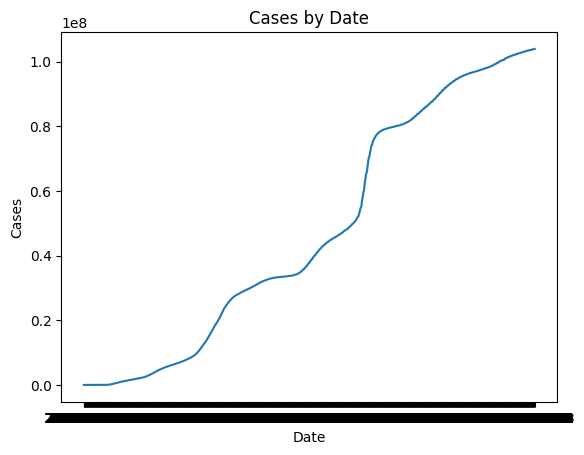

In [26]:
fig, axis = plot.subplots()

axis.plot(df['date'], df['cases'])

axis.set_xlabel('Date')
axis.set_ylabel('Cases')
axis.set_title('Cases by Date')

plot.show()

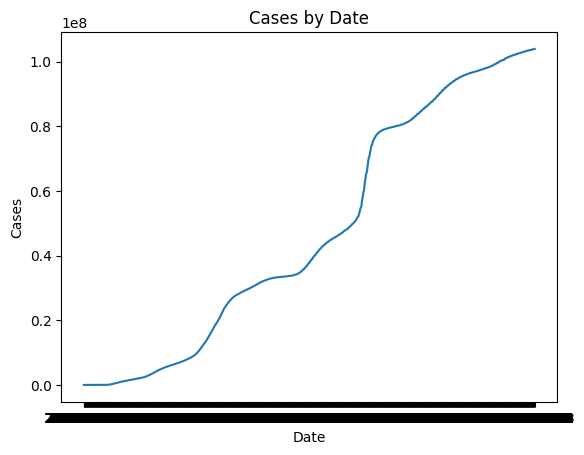

In [27]:
fig

### 6. Run the provided code (below) to plot the cumulative US cases.  You can run the code as-is (tweak variable names as needed).

### Next, tweak the provided code to make a new, but similar, chart using the plotly library to chart the day-over-day cases you created in question 3.

import plotly  
import plotly.graph_objects as go  

fig = go.Figure()
fig.add_trace(go.Scatter(  
    x=df['date'],  
    y=df['cases'],  
    name='US Cumulative Cases'  
))  
fig.update_layout(hovermode='x', title='US COVID-19 Cumulative Cases')  
fig.show()  

In [46]:
import plotly  
import plotly.graph_objects as go  

fig = go.Figure()
fig.add_trace(go.Scatter(  
    x=df['date'],  
    y=df['cases'],  
    name='US Cumulative Cases'  
))  
fig.update_layout(hovermode='x', title='US COVID-19 Cumulative Cases')  
fig.show()  

In [47]:
import plotly  
import plotly.graph_objects as go  

fig = go.Figure()
fig.add_trace(go.Scatter(  
    x=df['date'],  
    y=df['f_cases'],  
    name='US Cumulative Cases'  
))  
fig.update_layout(hovermode='x', title='US COVID-19 Cumulative Cases')  
fig.show()  

In [48]:
import plotly  
import plotly.graph_objects as go  

fig = go.Figure()
fig.add_trace(go.Scatter(  
    x=df['date'],  
    y=df['deaths'],  
    name='US Cumulative Cases'  
))  
fig.update_layout(hovermode='x', title='US COVID-19 Cumulative Cases')  
fig.show()  

#### 7. Do you prefer the plotly chart or the original matplotlib chart ?

I will prefer to use plotly, because of its interactive charts.


#### 8. What single day had the highest number of new cases?  How do you show the top 5 days?

In [33]:
sort_df_by_f_cases = df.sort_values(by=['f_cases'], ascending=False)

In [42]:
# Day with highest number of new cases
sort_df_by_f_cases.head(1)

,date,cases,deaths,f_cases
720,2022-01-10,61600909,838412,1433977.0


In [39]:
top_5_cases = sort_df_by_f_cases.head(5)

In [36]:
top_5_cases

,date,cases,deaths,f_cases
720,2022-01-10,61600909,838412,1433977.0
728,2022-01-18,67705340,854268,1178403.0
734,2022-01-24,71699954,867866,1032159.0
713,2022-01-03,56155999,826491,1018935.0
724,2022-01-14,65053852,849101,933326.0
